# Netflix Data Analysis

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. Tools used pandas,matplotlib,seaborn opendatasets

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rayyok
Your Kaggle Key: ········


100%|██████████| 1.18M/1.18M [00:00<00:00, 34.2MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './netflix-shows'

In [5]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "netflix-data-analysis" # change this (use lowercase letters and hyphens only)

In [16]:
!pip install jovian --upgrade -q

In [17]:
import jovian

In [18]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rayyos/netflix-data-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/rayyos/netflix-data-analysis


'https://jovian.ai/rayyos/netflix-data-analysis'

## Data Preparation and Cleaning
As we have imported the netflix.Before we start our analysis and visualization we need to clean and handle the missing values properly.


In [19]:
import pandas as pd

In [20]:
dataframe_netflix = pd.read_csv(data_dir + "/netflix_titles.csv");

In [22]:
dataframe_netflix.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6436,s6437,Movie,The Hater,Jan Komasa,"Maciej Musiałowski, Agata Kulesza, Danuta Sten...",Poland,"July 29, 2020",2020,TV-MA,136 min,"Dramas, International Movies, Thrillers",A duplicitous young man finds success in the d...
141,s142,TV Show,7SEEDS,NaN,"Nao Toyama, Jun Fukuyama, Katsuyuki Konishi, Y...",NaN,"March 26, 2020",2020,TV-MA,2 Seasons,"Anime Series, International TV Shows",Shy Natsu awakens as part of a group chosen to...
4430,s4431,Movie,Nature: Raising the Dinosaur Giant,NaN,David Attenborough,United States,"March 1, 2017",2016,TV-G,53 min,Documentaries,Sir David Attenborough examines a recently dis...
3194,s3195,Movie,Joaquín Reyes: Una y no más,José Miguel Contreras,Joaquín Reyes,NaN,"September 8, 2017",2017,TV-MA,78 min,Stand-Up Comedy,Comedian and celebrity impersonator Joaquín Re...
5335,s5336,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,"August 22, 2017",2016,TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...
2324,s2325,Movie,G.O.R.A,Ömer Faruk Sorak,"Cem Yılmaz, Rasim Öztekin, Özkan Uğur, İdil Fı...",Turkey,"March 10, 2017",2004,TV-MA,123 min,"Action & Adventure, Comedies, International Mo...",Carpet dealer and UFO photo forger Arif is abd...
4134,s4135,TV Show,Miss Dynamite,NaN,"Camila Sodi, Iván Sánchez, José María de Tavir...",Mexico,"May 5, 2018",2015,TV-14,1 Season,"Crime TV Shows, International TV Shows, Spanis...","Wealthy, beautiful Valentina falls in love, on..."
3832,s3833,Movie,Maacher Jhol,Pratim D. Gupta,"Ritwick Chakraborty, Mamata Shankar, Paoli Dam...","India, France","January 1, 2018",2017,TV-PG,107 min,"Dramas, International Movies",On his first visit to his home city of Kolkata...
2872,s2873,TV Show,Hunters of the South Seas,NaN,Will Millard,United Kingdom,"February 1, 2019",2015,TV-14,1 Season,"British TV Shows, Docuseries","In a far corner of the Pacific Ocean, people w..."
5571,s5572,Movie,Shonar Pahar,Parambrata Chatterjee,"Tanuja, Jishu Sengupta, Parambrata Chatterjee,...",India,"February 22, 2019",2018,TV-PG,131 min,"Dramas, Independent Movies, International Movies",An older woman's unique friendship with a youn...


In [23]:
dataframe_netflix.shape

(7787, 12)

There are 7787 row and 12 coloumns

### Handle missing, incorrect and invalid data

In [24]:
dataframe_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Director column have most of missing values.
let's replace null value with "unknow director" and other too

In [25]:
dataframe_netflix['director'].fillna("other director",inplace=True);
dataframe_netflix['country'].fillna("United States",inplace=True);
dataframe_netflix['rating'].fillna("TV-MA",inplace=True);


In [26]:
dataframe_netflix.loc[dataframe_netflix['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,other director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,other director,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,other director,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,other director,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,other director,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,other director,Igor Dmitriev,United States,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,other director,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,other director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,other director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,other director,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [27]:
#there 10 record where add_date is missing. for those null value replace it with release date.
#before that first we need to convert columns into same date time formate

In [28]:
dateData = pd.to_datetime(dataframe_netflix['release_year'],format='%Y')
dateData.loc[dataframe_netflix['date_added'].isnull()]
missvalueindexs = dataframe_netflix['date_added'].isnull()

In [29]:

dataframe_netflix['date_added'].loc[dataframe_netflix['date_added'].isnull()] = dateData.loc[dataframe_netflix['date_added'].isnull()]
dateData.loc[missvalueindexs]

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


258    2013-01-01
549    2018-01-01
2263   2003-01-01
2288   2003-01-01
2555   2008-01-01
3374   2010-01-01
3492   2012-01-01
3946   2016-01-01
5137   2015-01-01
6065   2015-01-01
Name: release_year, dtype: datetime64[ns]

### Parsing dates

In [30]:
dataframe_netflix['date_added'] = pd.to_datetime(dataframe_netflix['date_added'])


### Drop Cloumn

In [31]:
dataframe_netflix.drop(columns="cast",inplace=True)

In [32]:
dataframe_netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Know that is clean and let's start analysis

In [33]:
import jovian

In [71]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rayyos/netflix-data-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/rayyos/netflix-data-analysis


'https://jovian.ai/rayyos/netflix-data-analysis'

## Exploratory Analysis and Visualization

As the data set contain vast ammount of information , we are going to import the libraries we will use in the notebook and read the data m, handle the null values and understand the data so that we can analyze the data further.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [34]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [35]:
dataframe_netflix.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


**TODO** - Showing number of contents under Movie or Tv series tag

In [36]:
x = dataframe_netflix.type.value_counts()
x

Movie      5377
TV Show    2410
Name: type, dtype: int64

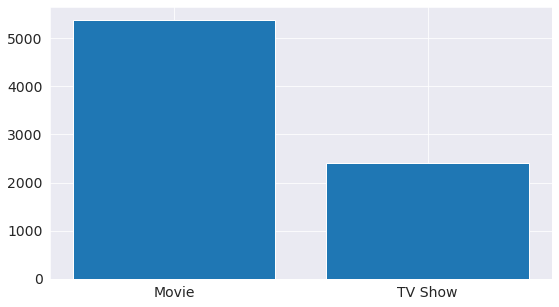

In [37]:
plt.bar(x.index,x);

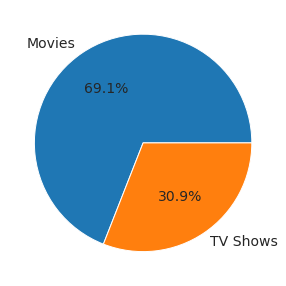

In [38]:
plt.pie(x.values,labels=["Movies","TV Shows"],autopct="%1.1f%%");

**TODO** - Number of content added on Netflix over the years

In [39]:
x = dataframe_netflix.groupby(['type','rating'])['rating'].count();
moviecount = dataframe_netflix[dataframe_netflix['type'] == "Movie"]
tvshowscount = dataframe_netflix[dataframe_netflix['type'] == "TV Show"];

In [40]:
tvshowscount

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,other director,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,other director,"Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,other director,United States,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,other director,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
7775,s7776,TV Show,Zoids Wild,other director,Japan,2020-08-14,2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,other director,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,other director,Mexico,2019-11-26,2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


In [41]:
moviecount = moviecount.release_year.value_counts();
tvshowscount = tvshowscount.release_year.value_counts();


In [42]:
print(tvshowscount[2021])
print(moviecount[2021])

19
12


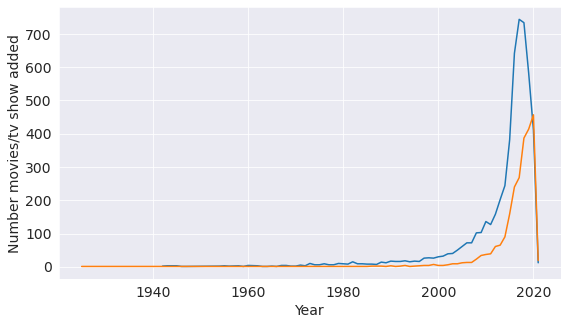

In [43]:
plt.xlabel("Year")
plt.ylabel("Number movies/tv show added")
sns.lineplot(x=moviecount.index ,y= moviecount.values)
sns.lineplot(x=tvshowscount.index ,y= tvshowscount.values);


**TODO** - Number of content get rating 

<AxesSubplot:xlabel='rating', ylabel='count'>

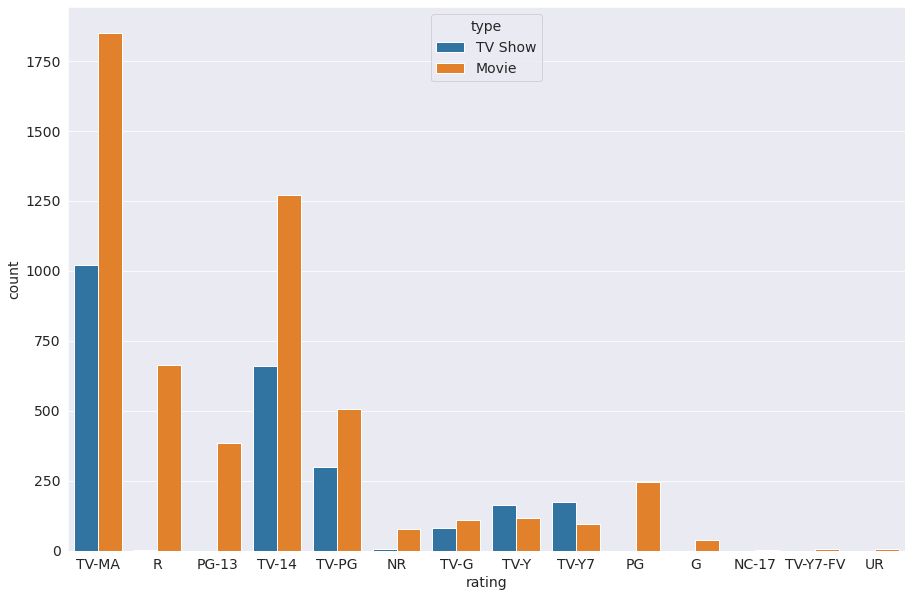

In [44]:
plt.figure(figsize=(15,10)) #Pltting the values obtained above
sns.countplot(x=dataframe_netflix['rating'],hue=dataframe_netflix['type'])

**TODO** - Number of content with respect to countries

In [45]:
x=dataframe_netflix['country'].value_counts().head(20);

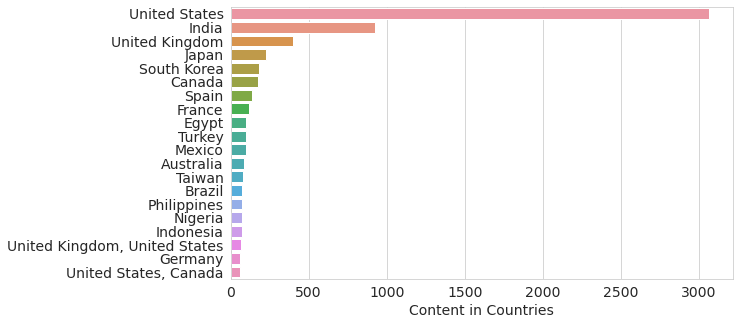

In [46]:
sns.set_style("whitegrid")
sns.barplot(x=x.values,y=x.index)
plt.xlabel("Content in Countries");


**TODO** - Number of movie content with respect to countries

In [47]:
moviecount = dataframe_netflix[dataframe_netflix['type'] == "Movie"]
tvshowscount = dataframe_netflix[dataframe_netflix['type'] == "TV Show"];


In [48]:
xcountry = moviecount.country.value_counts().head(10)
ycountry = tvshowscount.country.value_counts().head(10)

In [49]:
xcountry

United States     2080
India              852
United Kingdom     193
Canada             118
Spain               89
Egypt               89
Turkey              73
Philippines         70
France              69
Japan               69
Name: country, dtype: int64

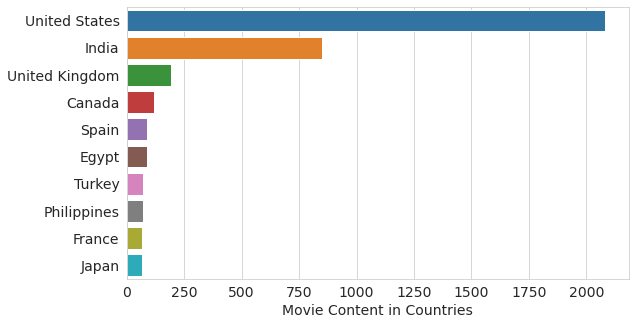

In [50]:
sns.set_style("whitegrid")
sns.barplot(x=xcountry.values,y=xcountry.index)
plt.xlabel("Movie Content in Countries");

**TODO** - Number of Tv Show content with respect to countries

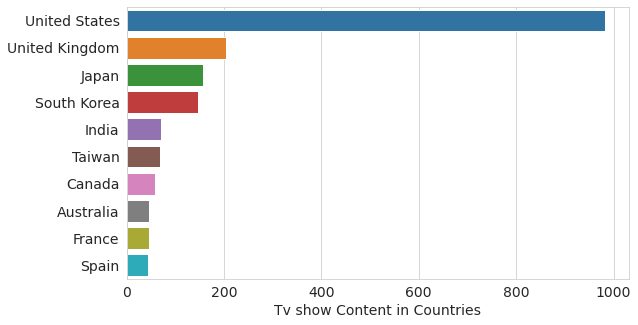

In [51]:
sns.set_style("whitegrid")
sns.barplot(x=ycountry.values,y=ycountry.index)
plt.xlabel("Tv show Content in Countries");

In [52]:
import jovian

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rayyos/netflix-data-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/rayyos/netflix-data-analysis


'https://jovian.ai/rayyos/netflix-data-analysis'

## Asking and Answering Questions

#### Q1: TODO - Top 10 Longest movie in netflix

In [54]:
moviecount = dataframe_netflix[dataframe_netflix['type'] == "Movie"]



In [55]:
duration = moviecount['duration'].str.replace('min','');
duration = duration.astype('int64')

In [56]:
moviecount['duration'] = duration


<ipython-input-56-d00bd3d07ccc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviecount['duration'] = duration


In [57]:
moviecount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 1 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5377 non-null   object        
 1   type          5377 non-null   object        
 2   title         5377 non-null   object        
 3   director      5377 non-null   object        
 4   country       5377 non-null   object        
 5   date_added    5377 non-null   datetime64[ns]
 6   release_year  5377 non-null   int64         
 7   rating        5377 non-null   object        
 8   duration      5377 non-null   int64         
 9   listed_in     5377 non-null   object        
 10  description   5377 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 504.1+ KB


In [58]:
top10 = moviecount.sort_values("duration",ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 logest movie on netflix')

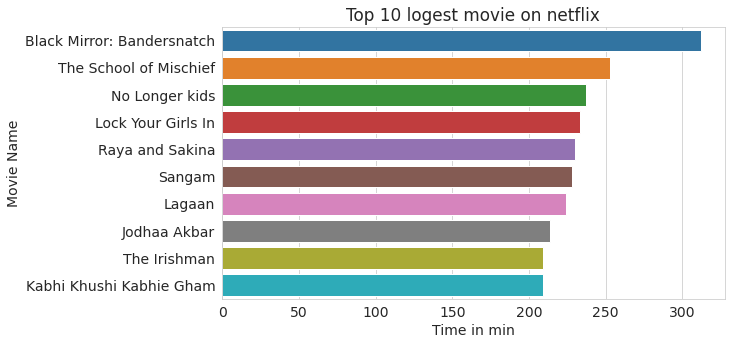

In [59]:
sns.barplot(x=top10.duration,y=top10.title)
plt.xlabel("Time in min")
plt.ylabel("Movie Name")
plt.title("Top 10 logest movie on netflix")

#### Q2: TODO - Top 10 Countries most content added.

In [60]:
top10Countries = dataframe_netflix

In [61]:
top10Countries = top10Countries.country.value_counts().head(10)

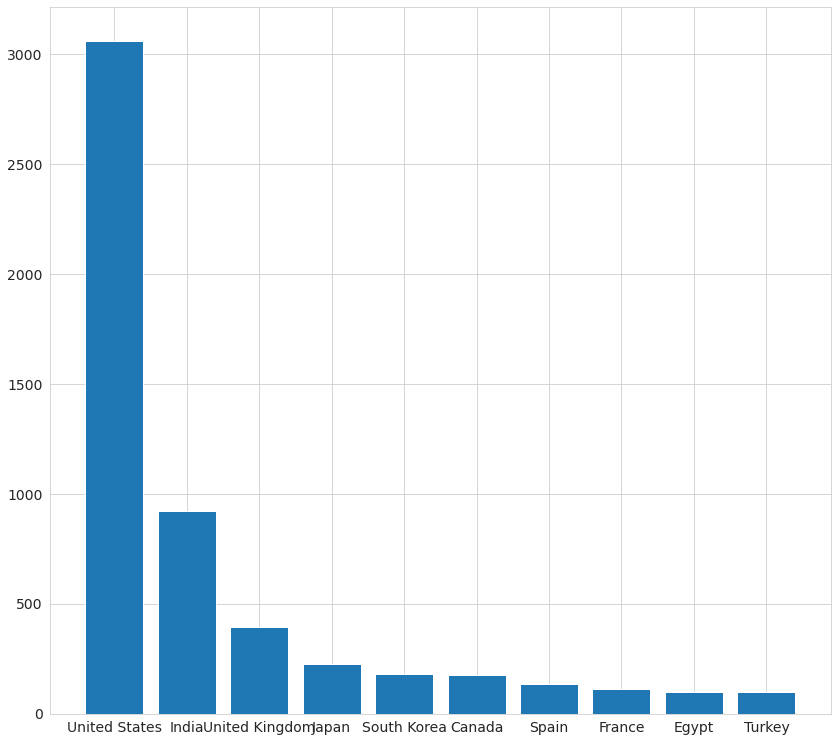

In [62]:
plt.figure(figsize=(14,13))
plt.bar(top10Countries.index,top10Countries);

#### Q3: TODO - Most common rating given to movie vs TV show

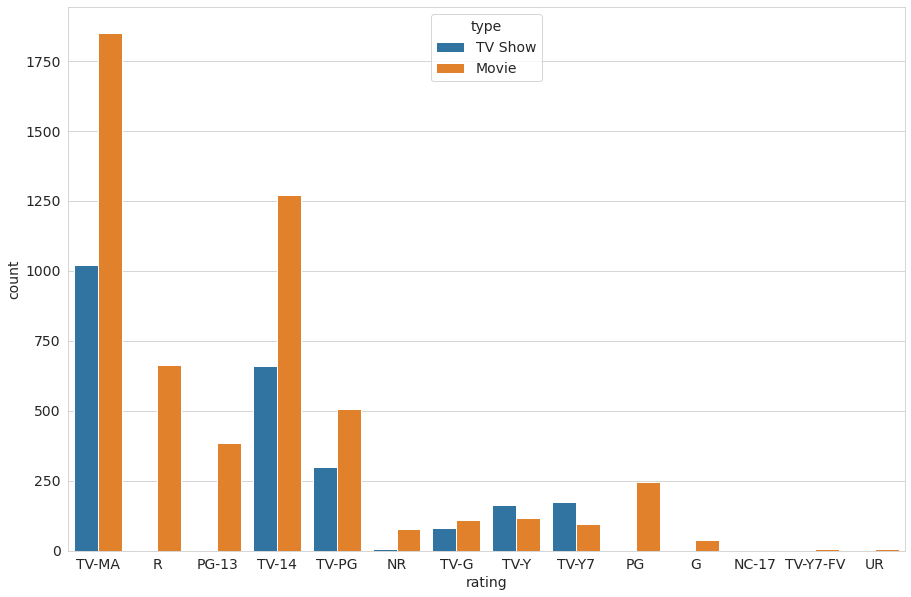

In [63]:
plt.figure(figsize=(15,10)) #Pltting the values obtained above
sns.countplot(x=dataframe_netflix['rating'],hue=dataframe_netflix['type']);

#### Q4: TODO - Top 10 director on netflix

In [67]:
top10director = dataframe_netflix

In [68]:
top10director = top10director.director.value_counts()

In [69]:
top10director = top10director.sort_values(ascending=False).head(11)

In [70]:
top10director = top10director.iloc[1:]

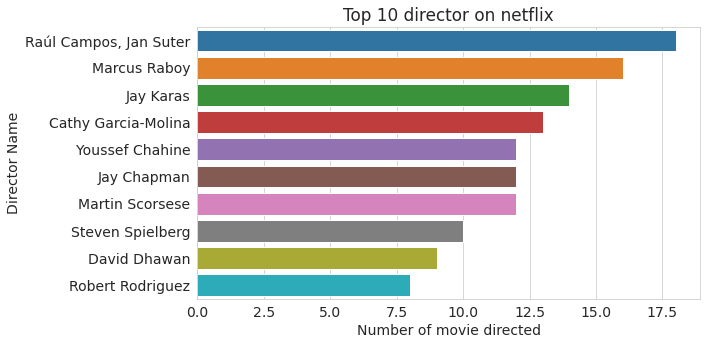

In [71]:
sns.barplot(x=top10director.values,y=top10director.index)
plt.xlabel("Number of movie directed")
plt.ylabel("Director Name")
plt.title("Top 10 director on netflix");

#### Q5: Top 10 Longest Session on netflix

In [114]:
tvshowcount = dataframe_netflix[dataframe_netflix['type'] == "TV Show"]

In [115]:
tvshowcount['duration'].unique()

array(['4 Seasons', '1 Season', '2 Seasons', '3 Seasons', '5 Seasons',
       '9 Seasons', '8 Seasons', '6 Seasons', '11 Seasons', '7 Seasons',
       '13 Seasons', '12 Seasons', '10 Seasons', '16 Seasons',
       '15 Seasons'], dtype=object)

In [116]:
duration = tvshowcount['duration'].str.replace('Seasons','');
duration = duration.str.replace('Season','');


In [117]:
duration = duration.astype('int64')

In [118]:
tvshowcount['duration'] = duration

<ipython-input-118-26e5597af603>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshowcount['duration'] = duration


In [119]:
tvshowcount['duration'].unique()

array([ 4,  1,  2,  3,  5,  9,  8,  6, 11,  7, 13, 12, 10, 16, 15])

In [123]:
tvshowtop10 = tvshowcount.sort_values("duration",ascending=False).head(10)

In [124]:
tvshowtop10

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
2538,s2539,TV Show,Grey's Anatomy,other director,United States,2020-05-09,2019,TV-14,16,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
4438,s4439,TV Show,NCIS,other director,United States,2018-07-01,2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...
5912,s5913,TV Show,Supernatural,Phil Sgriccia,"United States, Canada",2020-06-05,2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."
1471,s1472,TV Show,COMEDIANS of the world,other director,United States,2019-01-01,2019,TV-MA,13,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...
5137,s5138,TV Show,Red vs. Blue,other director,United States,2015-01-01,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
1537,s1538,TV Show,Criminal Minds,other director,"United States, Canada",2017-06-30,2017,TV-14,12,"Crime TV Shows, TV Dramas, TV Mysteries",This intense police procedural follows a group...
7169,s7170,TV Show,Trailer Park Boys,other director,Canada,2018-03-30,2018,TV-MA,12,"Classic & Cult TV, Crime TV Shows, Internation...",Follow the booze-fueled misadventures of three...
2678,s2679,TV Show,Heartland,other director,Canada,2019-08-01,2017,TV-14,11,TV Dramas,Spunky teenager Amy is reeling from the sudden...
1300,s1301,TV Show,Cheers,other director,United States,2017-07-01,1992,TV-PG,11,"Classic & Cult TV, TV Comedies","Sam Malone, an ex-baseball player turned bar o..."
2263,s2264,TV Show,Frasier,other director,United States,2003-01-01,2003,TV-PG,11,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...


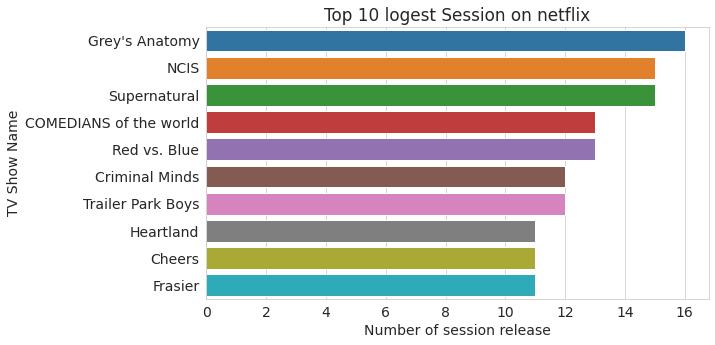

In [126]:
sns.barplot(x=tvshowtop10.duration,y=tvshowtop10.title)
plt.xlabel("Number of session release")
plt.ylabel("TV Show Name")
plt.title("Top 10 logest Session on netflix");

In [ ]:
import jovian

In [127]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rayyos/netflix-data-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/rayyos/netflix-data-analysis


'https://jovian.ai/rayyos/netflix-data-analysis'

## Inferences and Conclusion
 * In this notebook I have tried to analyze Netflix Data.
 * After the analysis we concluded that netflix has more movies than TV shows, 
 * Most of the content on netflix is rated TV-MA.
 * Mojority content is added by United States.
 * size of netflix content has been significantly increase over the last few 10 year.
 * netflix start adding more tv-show content since 2005.
 * one of the famous directors on netflix are "raul campos jan suter" they directed 17+ movie or tv show. 
 * The most longest movie on netlix is "The School of Mischief " which is 4h 12min long that released in 1973.
 * The longest Tv-Show on netflix "Grey's Anatomy" which has 17 seasons.


In [1]:
import jovian

In [2]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rayyos/netflix-data-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/rayyos/netflix-data-analysis


'https://jovian.ai/rayyos/netflix-data-analysis'

## References and Future Work
    * https://www.kaggle.com/shivamb/netflix-shows(link to the dataset)
    * Numerical computing with Numpy: https://jovian.ml/aakashns/python-numerical-computing-with-numpy
    * Analyzing tabular data with Pandas: https://jovian.ml/aakashns/python-pandas-data-analysis
    * Matplotlib & Seaborn tutorial: https://jovian.ml/aakashns/python-matplotlib-data-visualization
    * Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
    * Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
    * Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

In [3]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
